# Diabetes 

Pima Indians Diabetes Dataset, which is available from the UCI Machine Learning Repository. This dataset contains information on 768 females of Pima Indian heritage, aged 21 and above, residing in Arizona, USA. The data includes variables such as age, BMI, blood pressure, glucose level, and diabetes status (whether or not the person has diabetes). The goal of this dataset is to predict whether a given individual will develop diabetes within the next five years.

Here is a brief description of the features in the Pima Indians Diabetes Dataset:

    Pregnancies: Number of times the patient has been pregnant
    Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
    BloodPressure: Diastolic blood pressure (mm Hg)
    SkinThickness: Triceps skin fold thickness (mm)
    Insulin: 2-Hour serum insulin (mu U/ml)
    BMI: Body mass index (weight in kg/(height in m)^2)
    DiabetesPedigreeFunction: Diabetes pedigree function
    Age: Age in years
    Outcome: Class variable (0 or 1), where 1 indicates that the patient has diabetes and 0 indicates that the patient 
    does not have diabetes.

# 1. Import Required Librarys

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec
import seaborn as sns
from functions import distribution_plot 

from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PowerTransformer, QuantileTransformer, MinMaxScaler
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
import pickle

from functions import distribution_plot,residual_plot, qq_plot, model_score

import warnings
warnings.simplefilter(action='ignore')

%matplotlib inline

plt.rc("figure", autolayout=True)
plt.rc('axes', labelsize=12, titlesize=16)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('legend', fontsize=14)
plt.rc('lines', markersize='8', markeredgecolor='blue', markerfacecolor='white', markeredgewidth=1, linewidth=2)

# 2. Loading Dataset

In [44]:
df = pd.read_csv('diabetes.csv')
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# 3. Exploratory Data Analysis

## 3.1 Undestanding Data

In [45]:
print('Dataset contains %s diabetes cases and %s variables which are divided into 8 independent features and 1 dependent target' %(df.shape[0], df.shape[1]))

Dataset contains 768 diabetes cases and 9 variables which are divided into 8 independent features and 1 dependent target


In [46]:
print('Dataset contains following column names:')
for i ,j in enumerate(df.columns):
    print(('%s. %s') %(i, j))

Dataset contains following column names:
0. Pregnancies
1. Glucose
2. BloodPressure
3. SkinThickness
4. Insulin
5. BMI
6. DiabetesPedigreeFunction
7. Age
8. Outcome


In [47]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

The <b>DiabetesPedigreeFunction</b> has a very low standard deviation, indicating that it may not be a useful feature for machine learning prediction

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset contains only numerical data, with no NaN or missing values. However, some features such as glucose, blood pressure, skin thickness, insulin, and BMI contain zero values that appear to be incorrect.

## 3.2 Cleaning Data

In [49]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [50]:
features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
miss_value = df[features].isin({0}).sum()/len(df)*100

In [51]:
miss_value

Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
BMI               1.432292
dtype: float64

Text(0, 0.5, 'Missing values [%]')

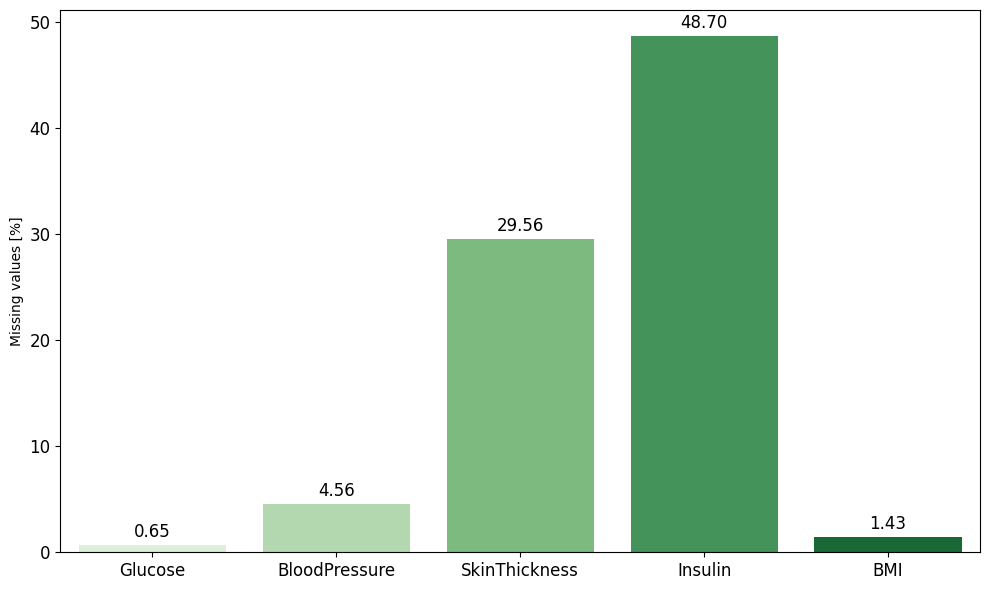

In [52]:
fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x=features, y=miss_value.values, palette='Greens', ax=ax)
ax.bar_label(ax.containers[0], fmt='%.2f', padding=3, size=12)
ax.set_ylabel('Missing values [%]')

Median values will be used to replace any zero values for each feature independently in both the diabetic and non-diabetic datasets.

In [53]:
for feature in features:
    df[feature] = df[feature].replace({0: np.nan})

In [54]:
for feature in features:
    df_median = df.groupby(by='Outcome')[feature].median()
    df.loc[df['Outcome'] == 0, feature] = df.loc[df['Outcome'] == 0, feature].replace({np.nan : df_median[0]})
    df.loc[df['Outcome'] == 1, feature] = df.loc[df['Outcome'] == 1, feature].replace({np.nan : df_median[1]})
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6    148.0           72.0           35.0    169.5  33.6   
1            1     85.0           66.0           29.0    102.5  26.6   
2            8    183.0           64.0           32.0    169.5  23.3   
3            1     89.0           66.0           23.0     94.0  28.1   
4            0    137.0           40.0           35.0    168.0  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

# 5. Feature Engineering

## 5.1 Plots of variables and correlations

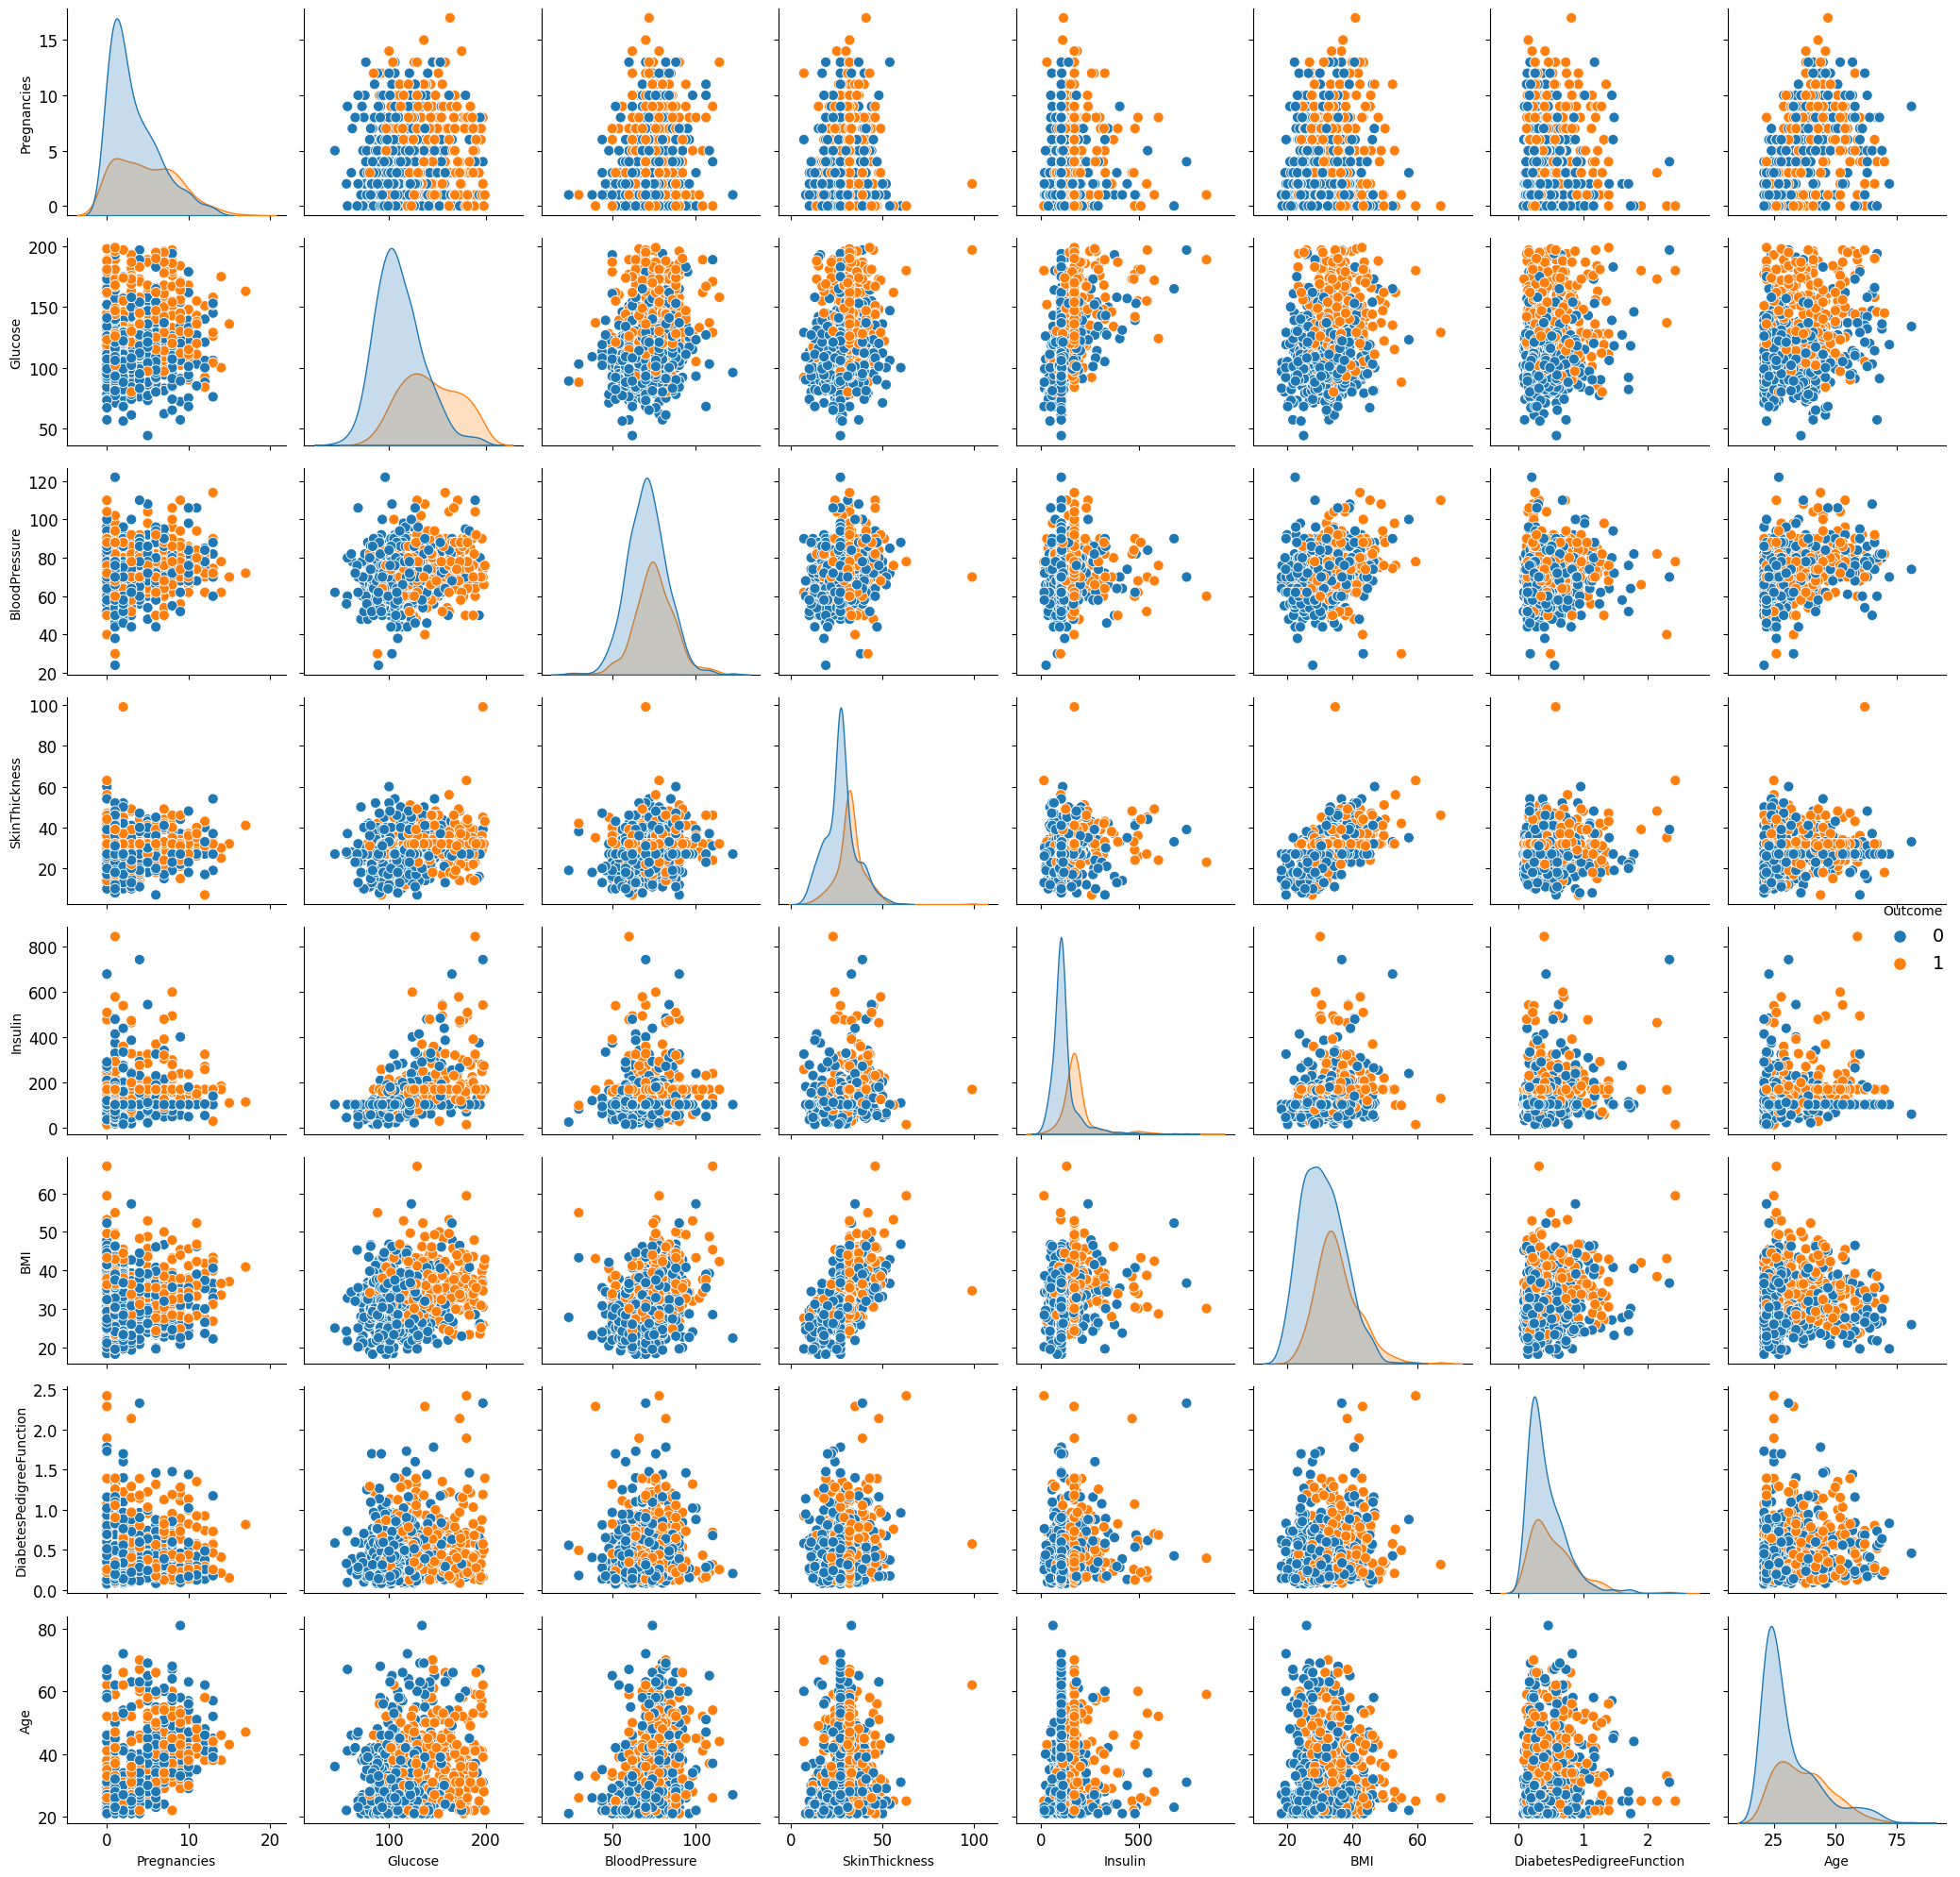

In [55]:
sns.pairplot(data=df, hue='Outcome')

<Axes: >

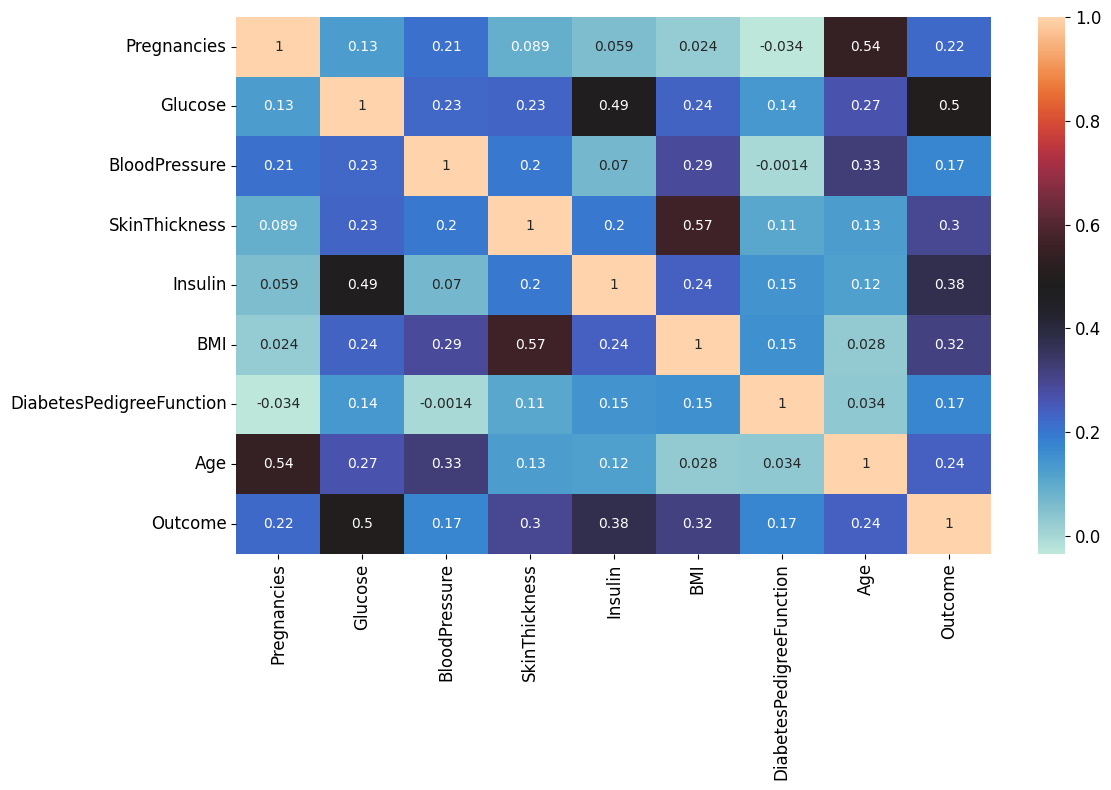

In [56]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='icefire', ax=ax)

The pair plot and correlation matrix indicate a strong correlation between Glucose and the target variable. Additionally, certain features exhibit correlation with one another, such as BMI with Skin Thickness, Age with Pregnancies, and Glucose with Insulin.
The lowest correlation with outcome has <b>Blood Pressure</b> and <b>Skin Thickness</b>

In [57]:
diabetes = df.groupby(by='Outcome')['Outcome'].count()

[None, None, None, None]

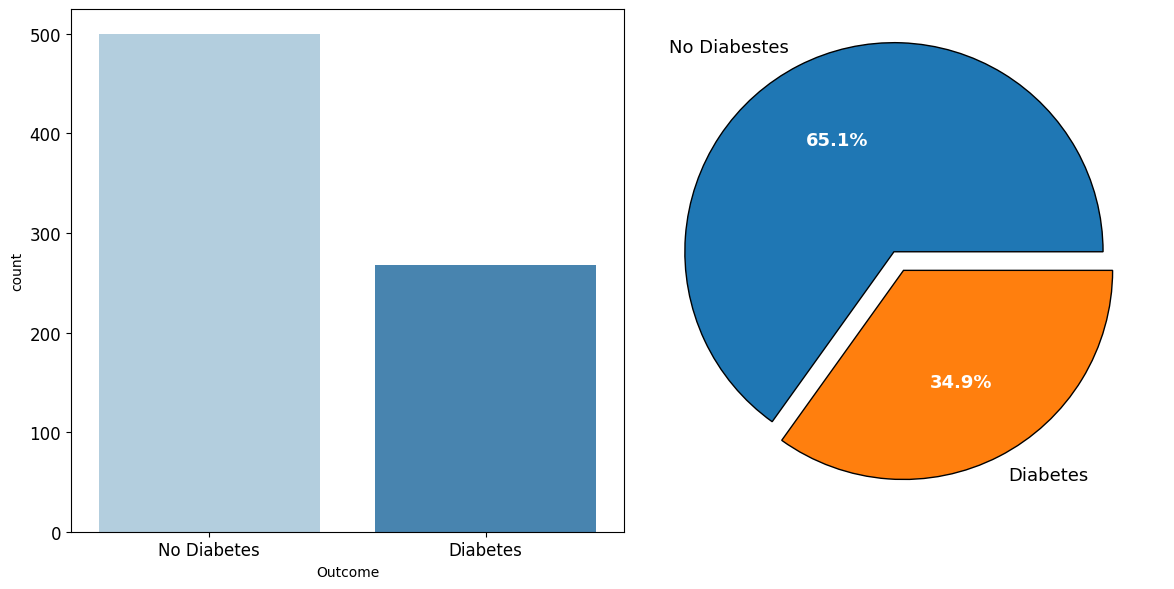

In [58]:
fig, (ax0, ax1)  = plt.subplots(1,2, figsize=(12,6))
sns.countplot(data=df, x='Outcome', palette='Blues', ax=ax0)
ax0.set_xticklabels(['No Diabetes', 'Diabetes'])

wedge, text, autotext = ax1.pie(diabetes, autopct='%.1f%%', explode=(0.1,0), labels=['No Diabestes', 'Diabetes'])
plt.setp(autotext,size=13, color='white', weight='bold')
plt.setp(wedge, edgecolor='black', linewidth=1)
plt.setp(text, fontsize=13)


The target variable appears to be imbalanced, with approximately 65% of the records indicating no diabetes and 35% indicating diabetes in the dataset.

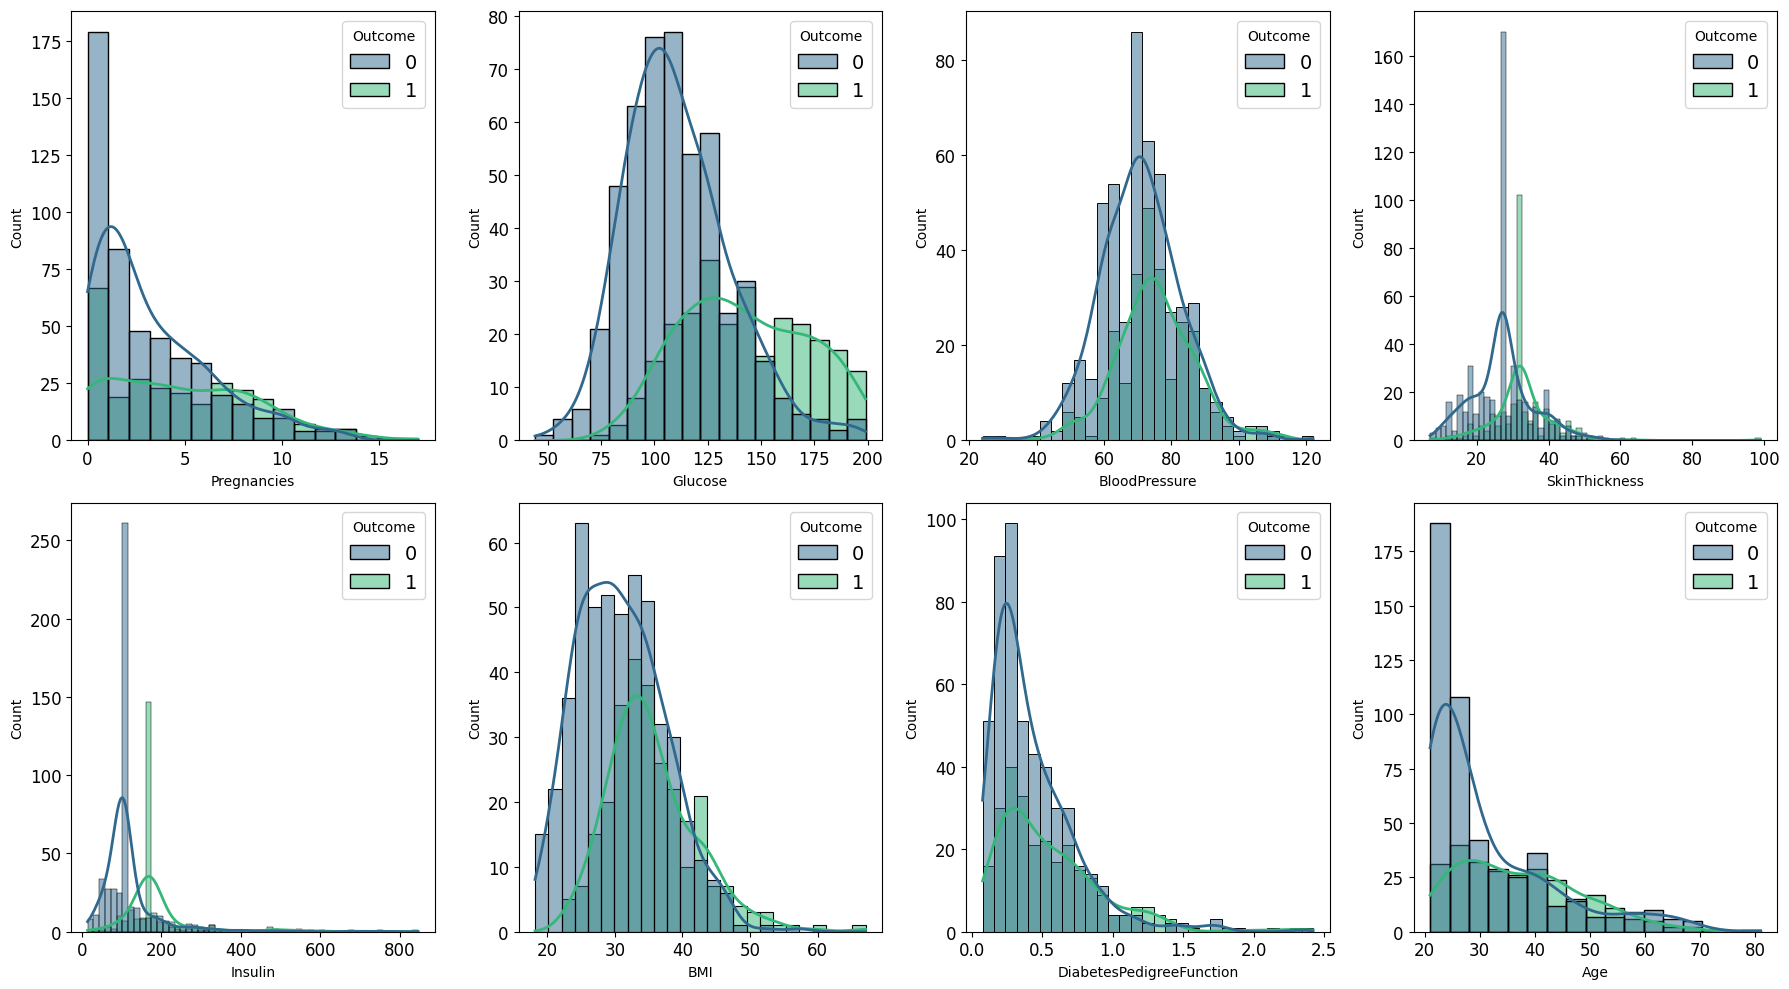

In [59]:
features = df.drop('Outcome', axis=1)
fig, ax = plt.subplots(figsize=(18,10))
for idx, feature in enumerate(features):
    plt.subplot(2,4,idx+1)
    sns.histplot(data=df, x=feature, hue='Outcome', kde=True, palette='viridis')

The histogram plots indicate that Glucose, Blood Pressure, and Skin Thickness are approximately normally distributed. However, the remaining features are left-skewed and should be transformed prior to use with machine learning algorithms.

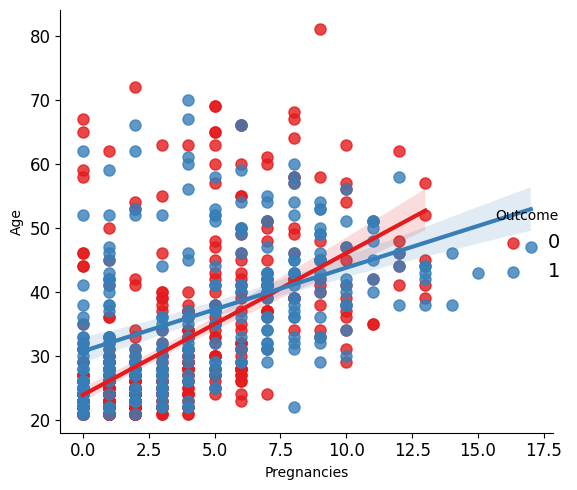

In [60]:
sns.lmplot(data=df, x='Pregnancies', y='Age', hue='Outcome', palette='Set1')

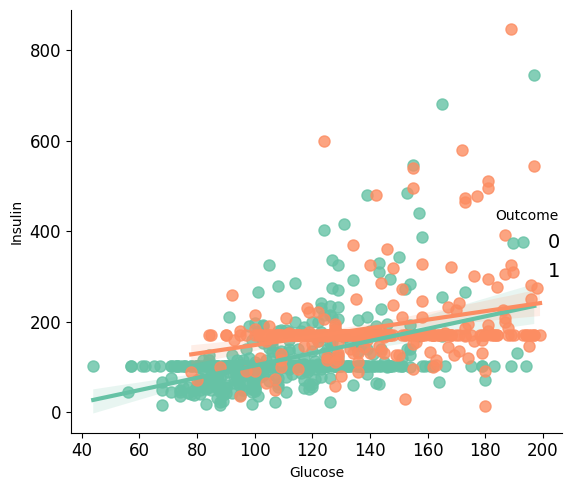

In [61]:
sns.lmplot(data=df, x='Glucose', y='Insulin', hue='Outcome', palette='Set2')

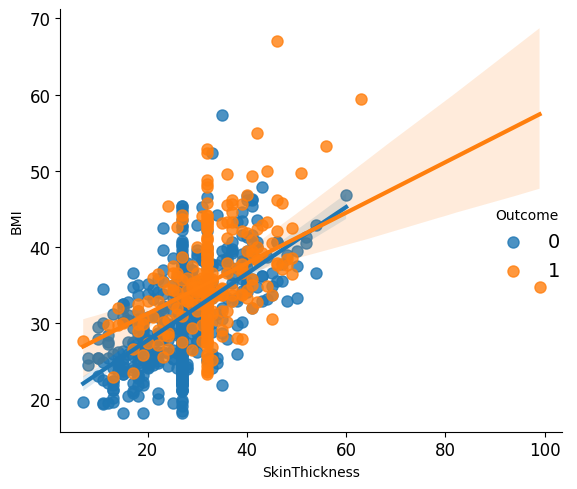

In [62]:
sns.lmplot(data=df, x='SkinThickness', y='BMI', hue='Outcome', palette='tab10')

## 5.2 Handling with Outlires

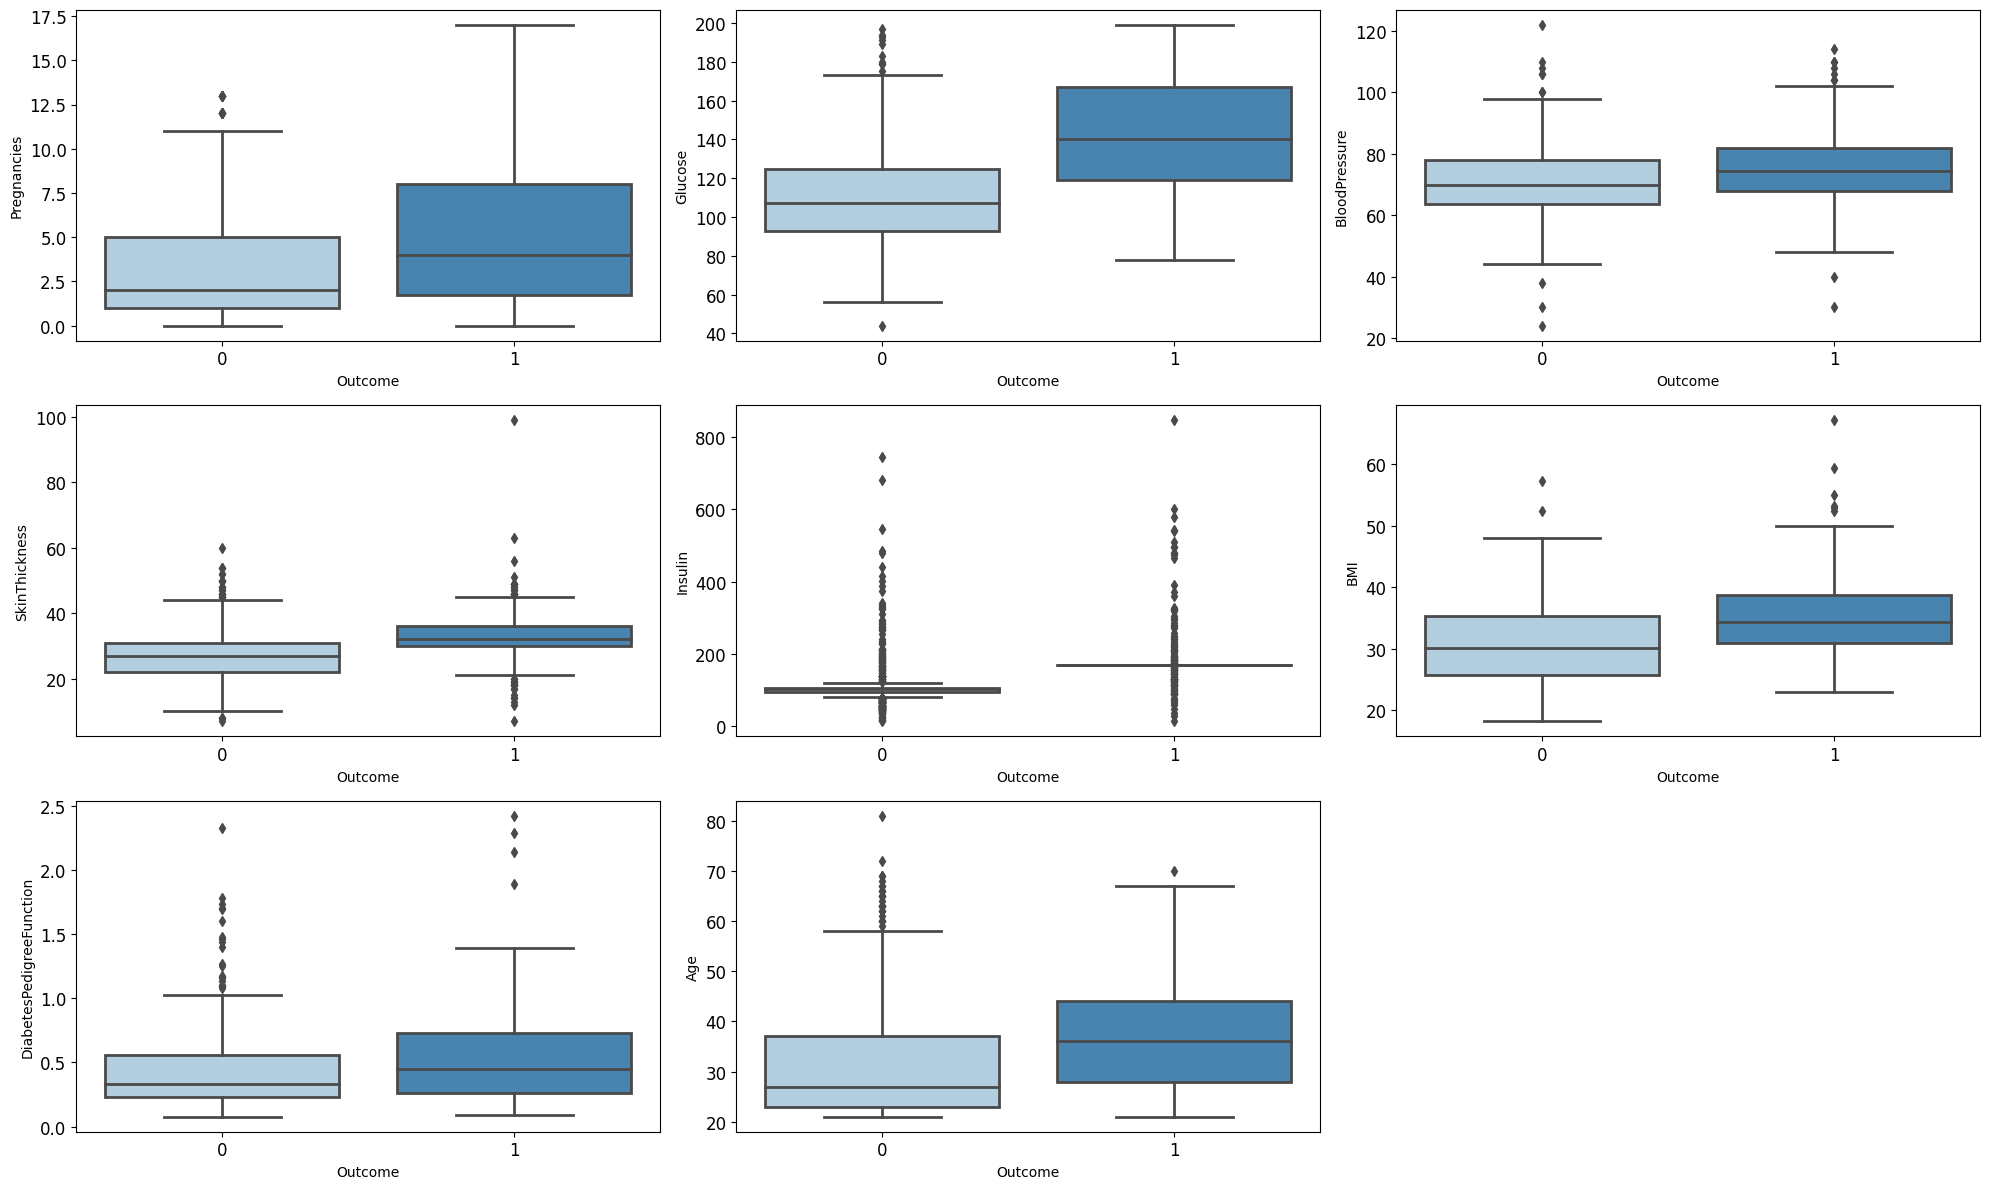

In [63]:
fig, ax = plt.subplots(figsize=(20,12))
for ind, feature in enumerate(features):
    plt.subplot(3,3, ind+1)
    sns.boxplot(data=df, y=df[feature], x='Outcome', palette='Blues')
    

There are a significant number of outliers in <b>Insulin</b> and <b>DiabetesPedigreeFunction</b>, but we won't remove them. Instead, we will use transformation techniques to address this issue

"The mean values of <b>Blood Pressure</b> in diabetic and non-diabetic individuals are very similar. This may not provide significant information for a prediction model."

<Axes: xlabel='Outcome', ylabel='Glucose'>

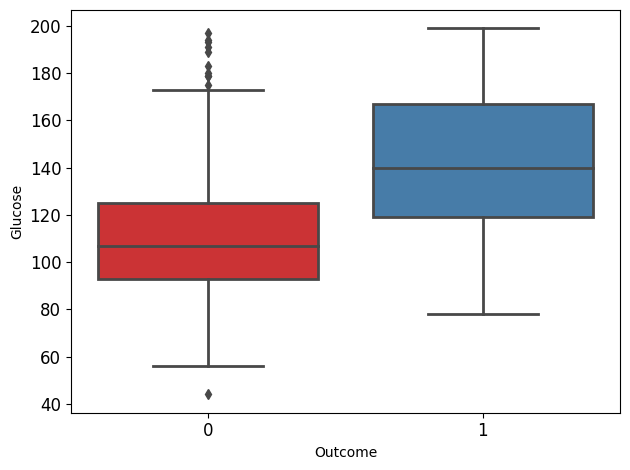

In [64]:
sns.boxplot(data=df, x='Outcome', y='Glucose', palette='Set1')

The highest probability of developing diabetes occurs when the Glucose level is between 125 and 175. For lower values of Glucose, the probability of developing diabetes decreases significantly.
The mean value of Glucose for non-diabetics is 111, while for diabetics it is 142.

<Axes: xlabel='Outcome', ylabel='Age'>

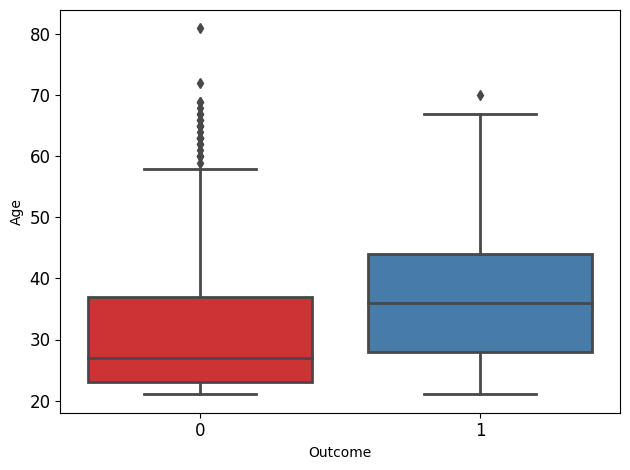

In [65]:
sns.boxplot(data=df, x='Outcome', y='Age', palette='Set1')

Age is a factor in diabetes classification. For younger people, there is a lower probability of being diabetic, while the probability of being diabetic increases after the age of 35. The mean value of Age value for non-diabetics is 31, while for diabetics it is 37.

## 5.3 Skew and Kurthosis Analysis

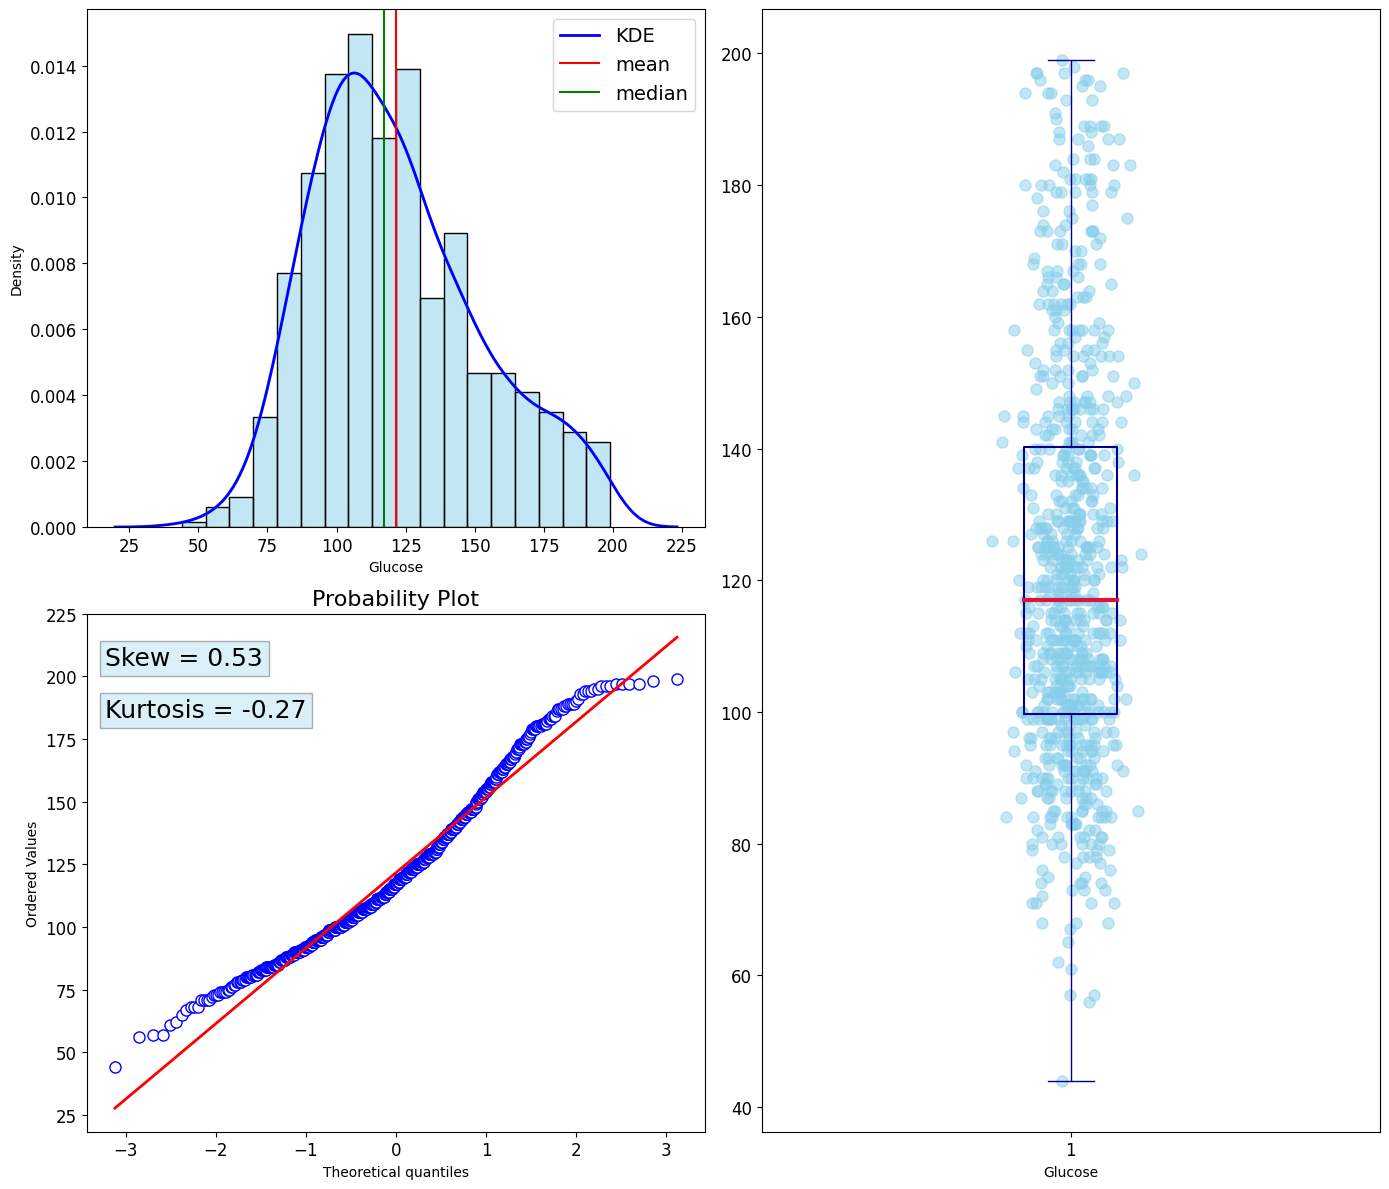

In [66]:
distribution_plot(df['Glucose'])

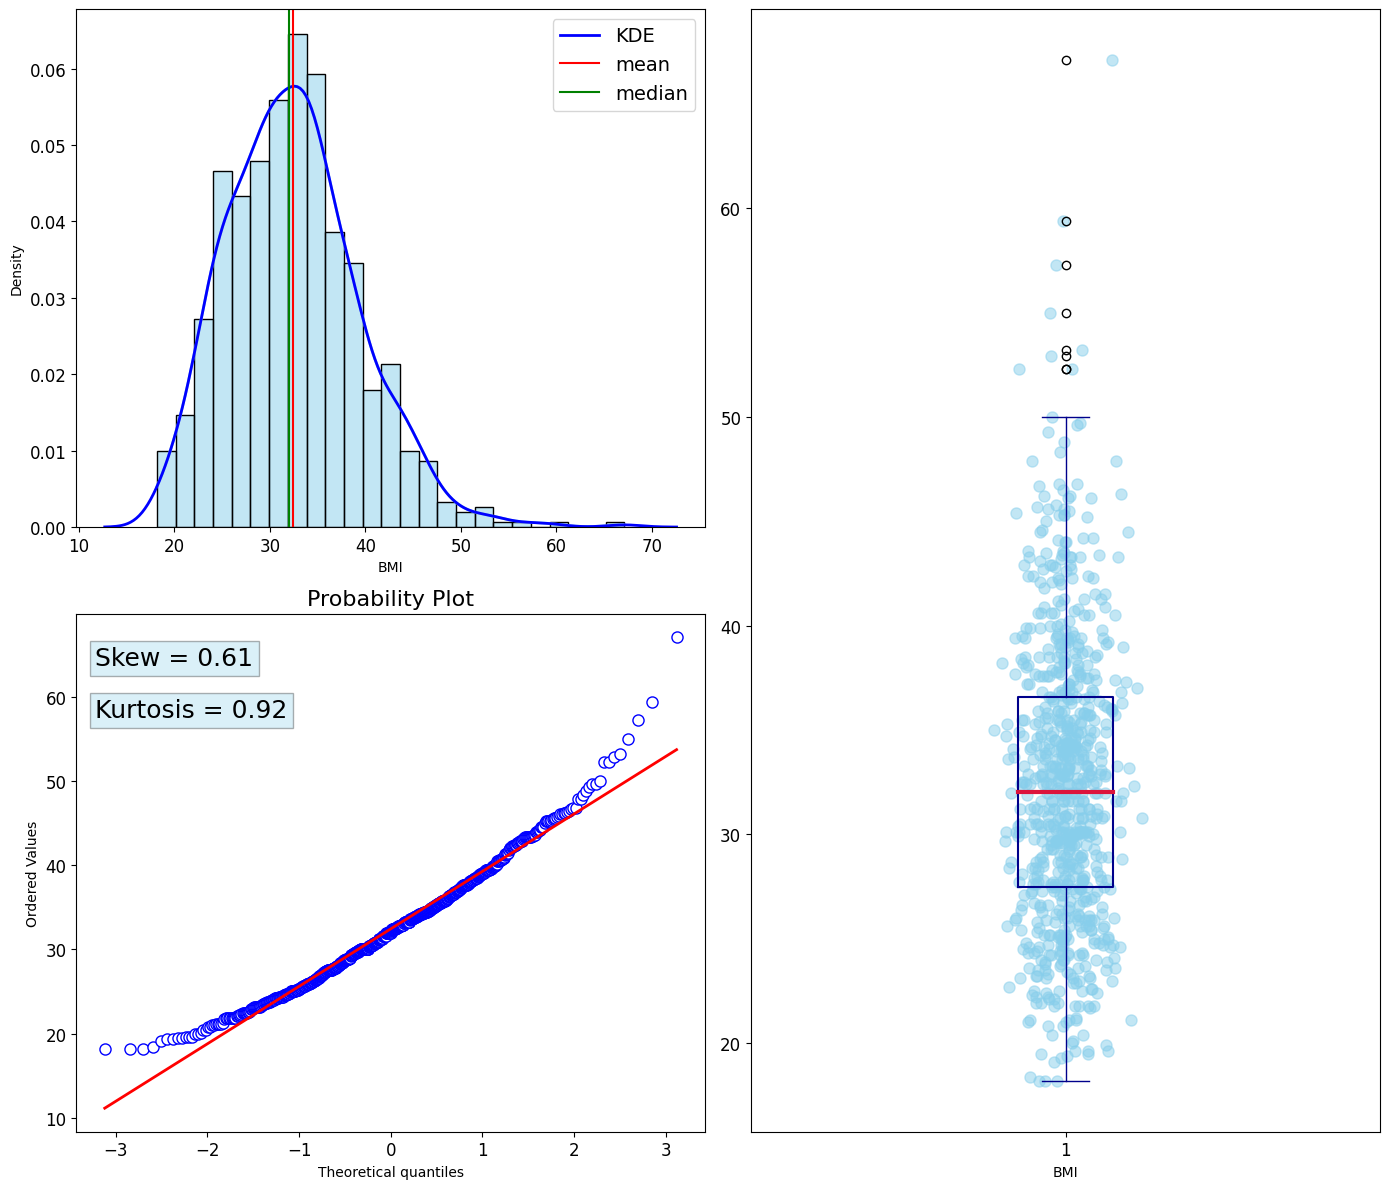

In [67]:
distribution_plot(df['BMI'])

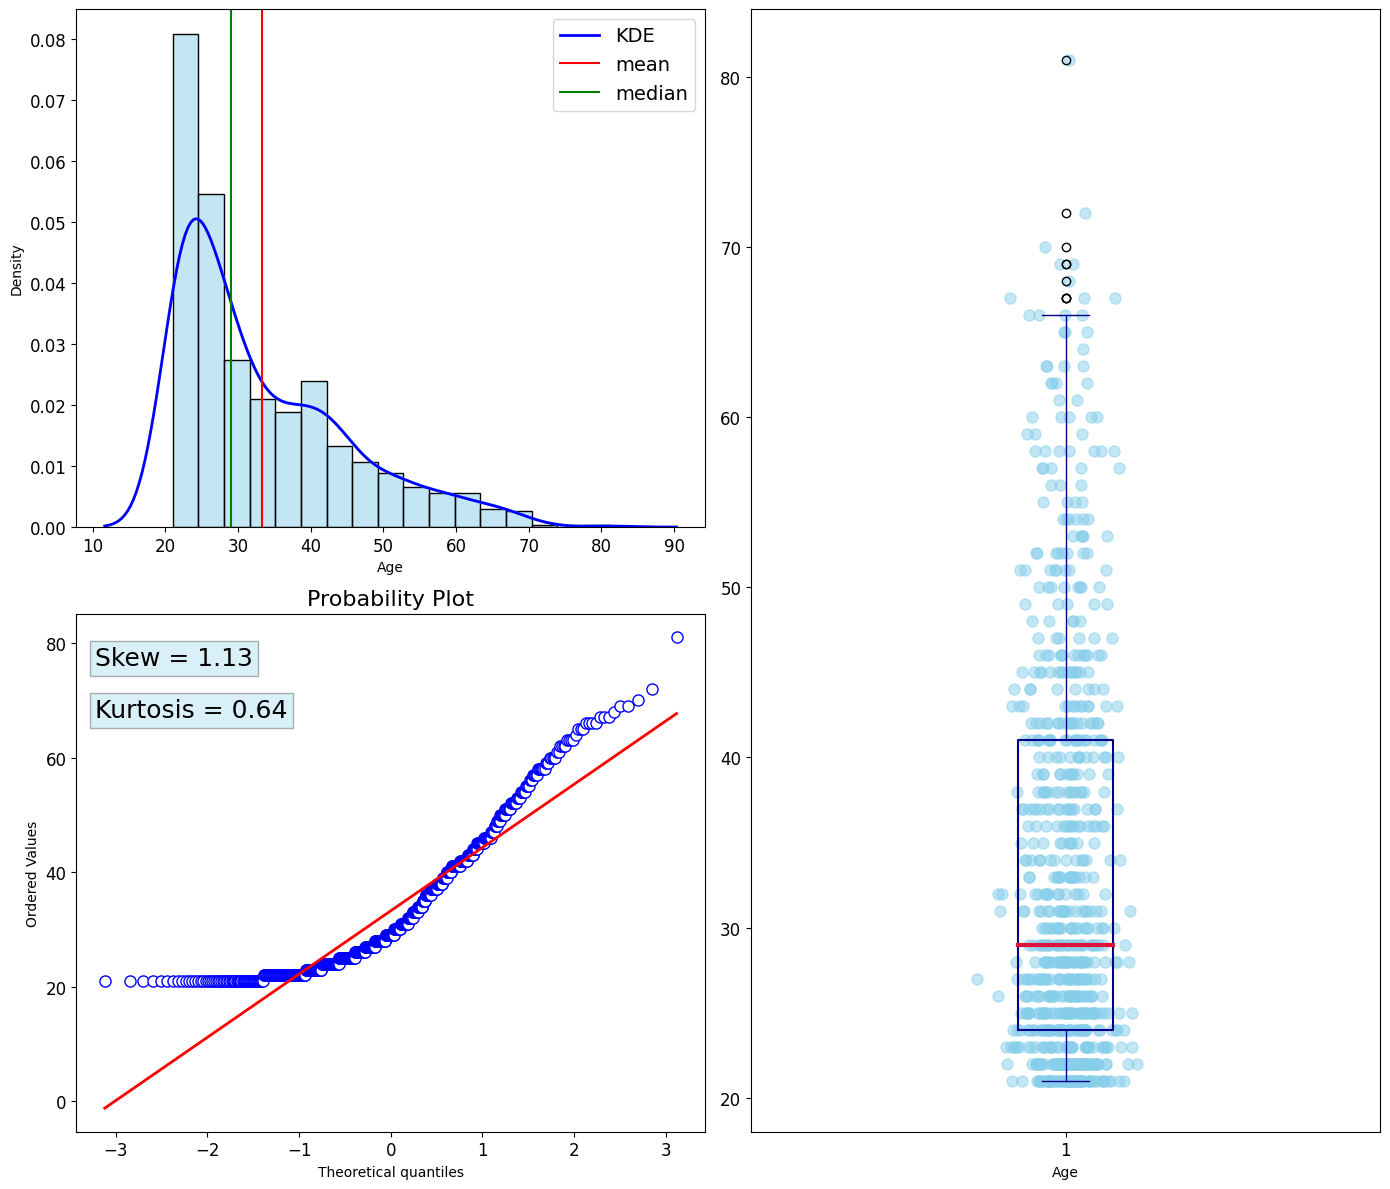

In [68]:
distribution_plot(df['Age'])

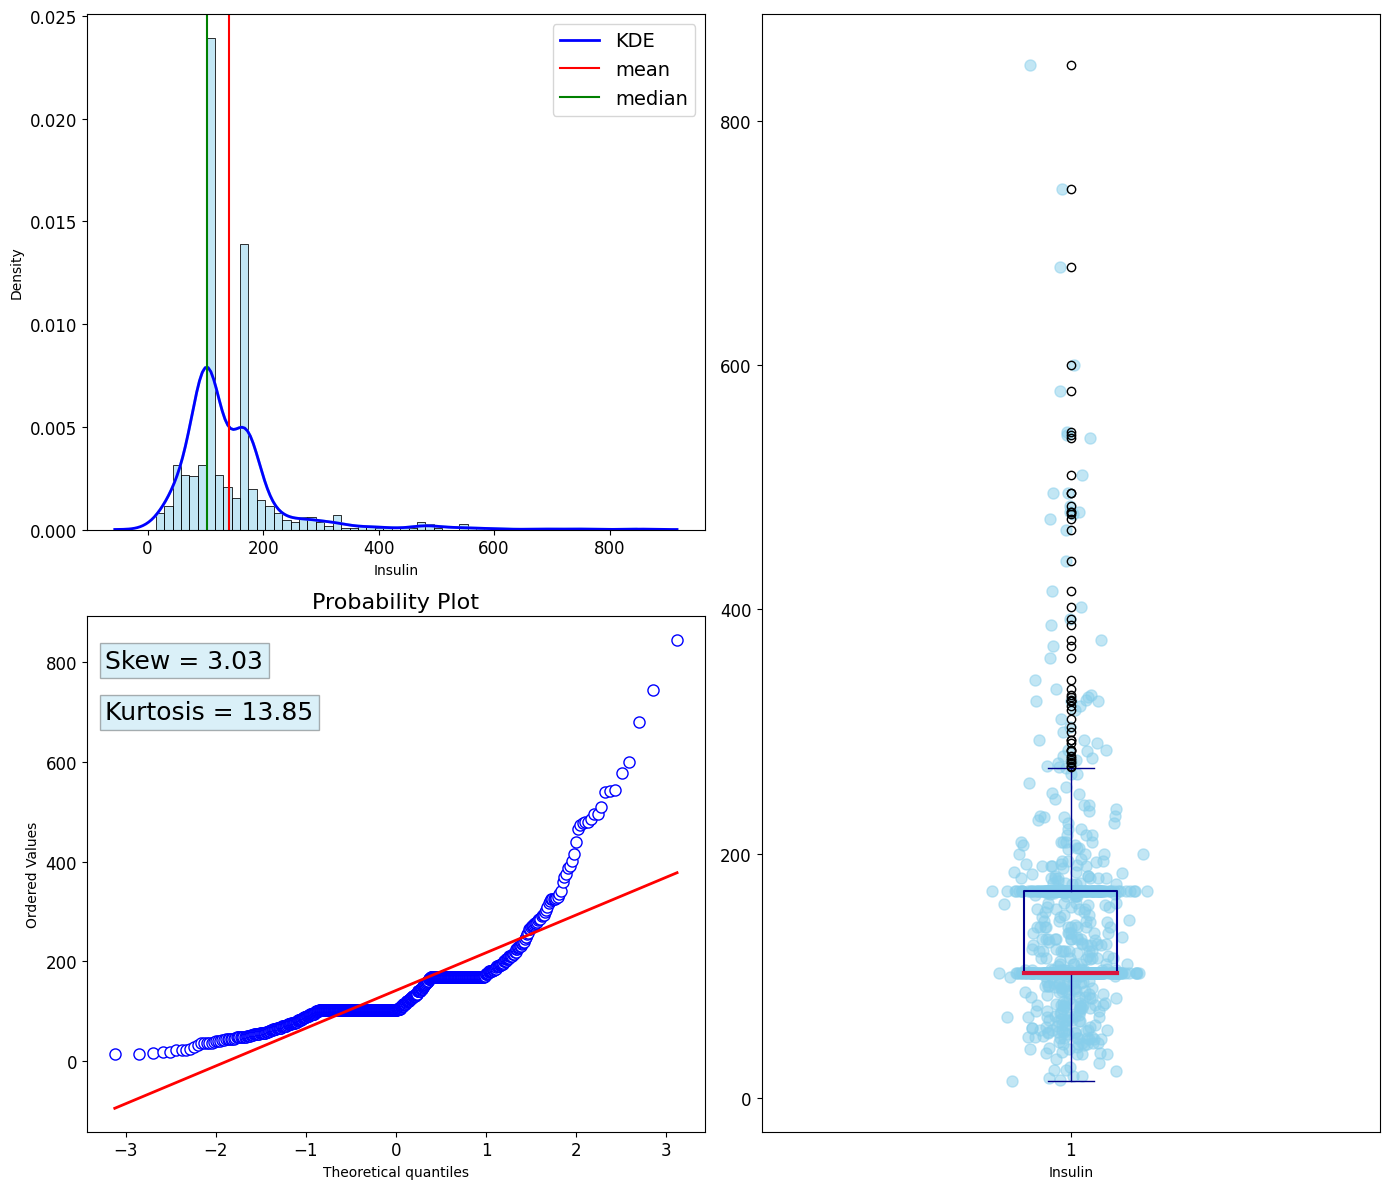

In [69]:
distribution_plot(df['Insulin'])

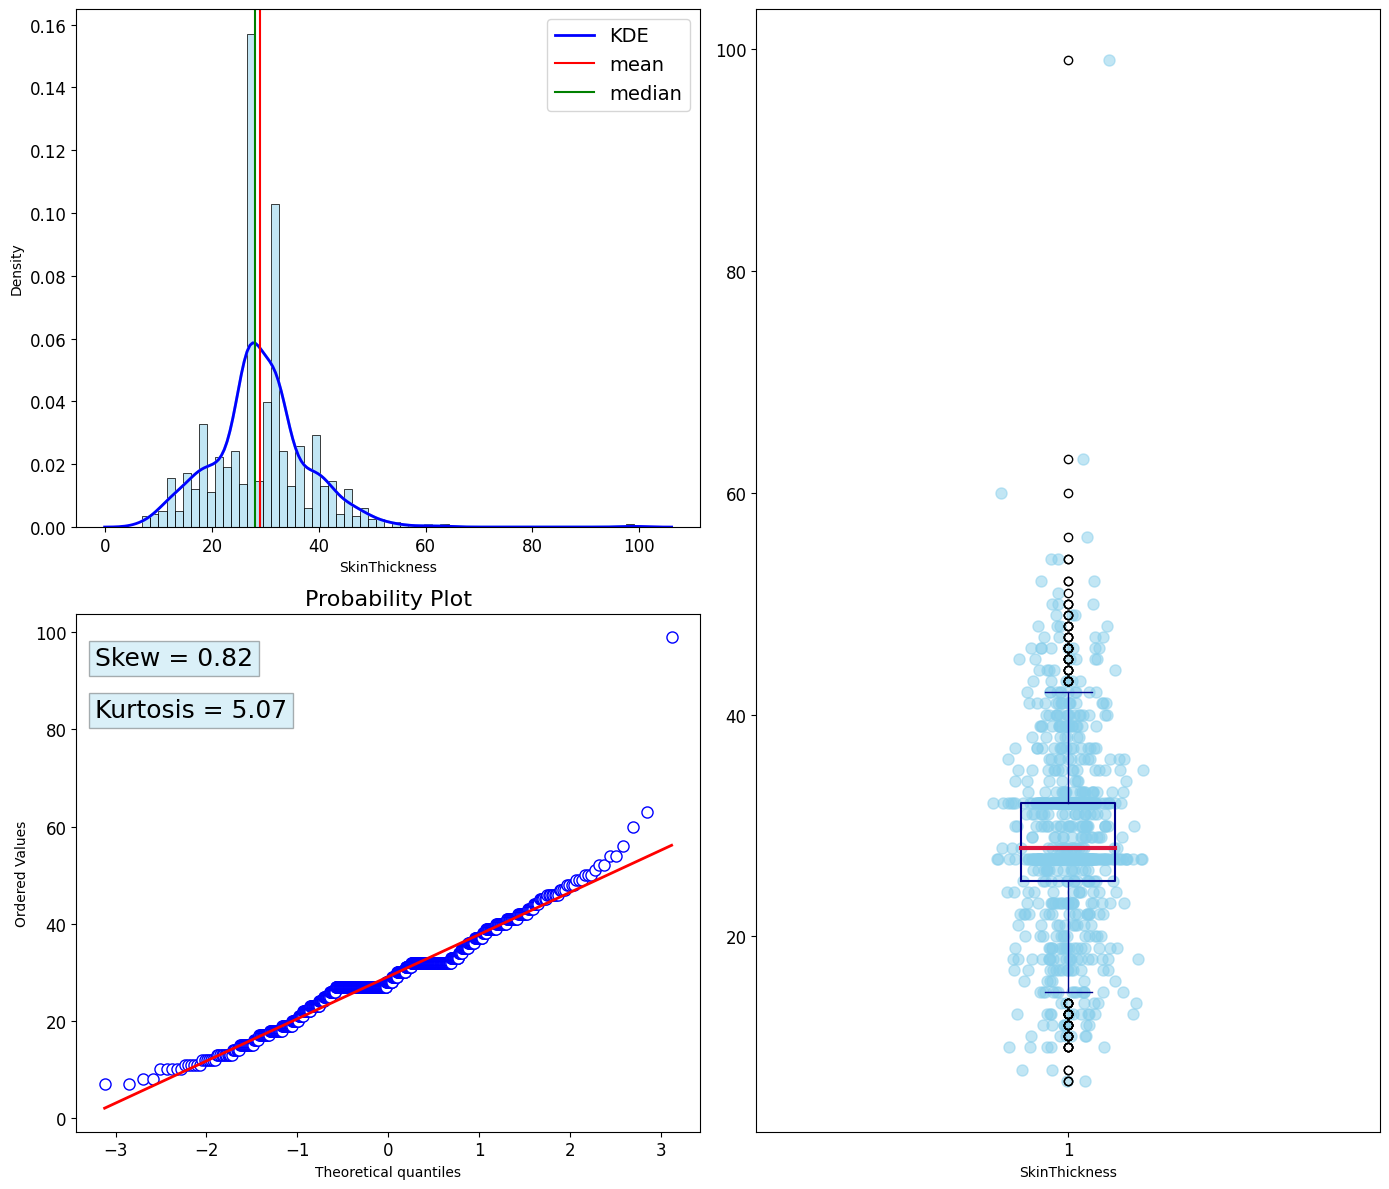

In [70]:
distribution_plot(df['SkinThickness'])

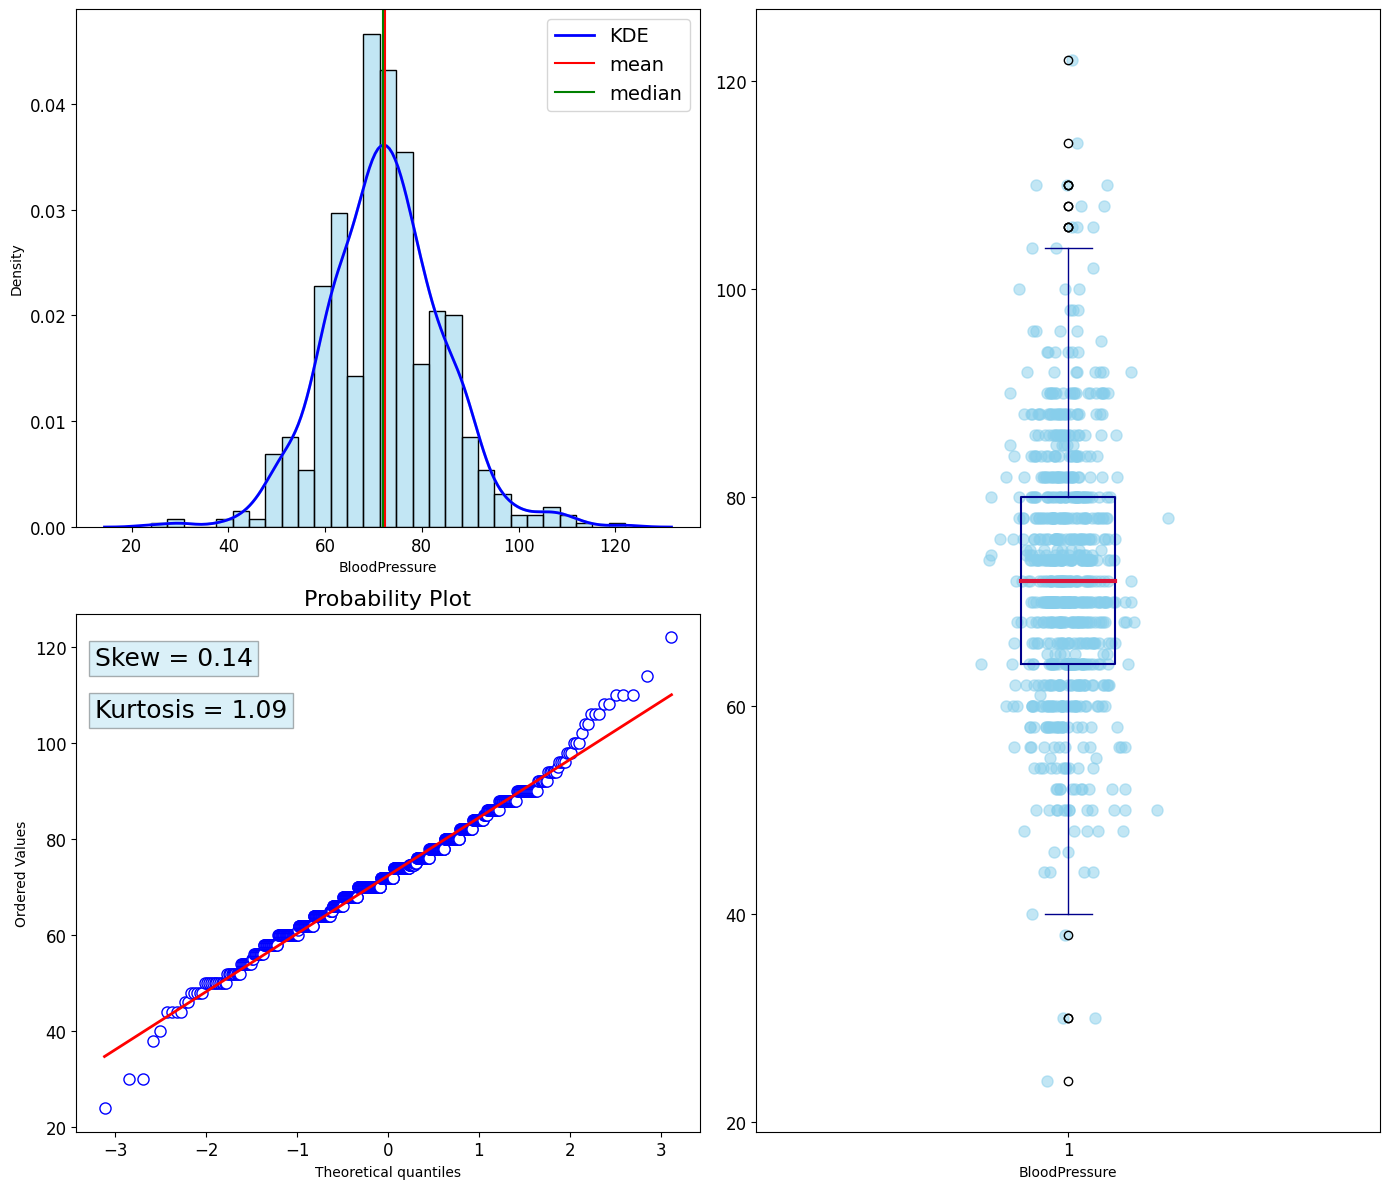

In [71]:
distribution_plot(df['BloodPressure'])

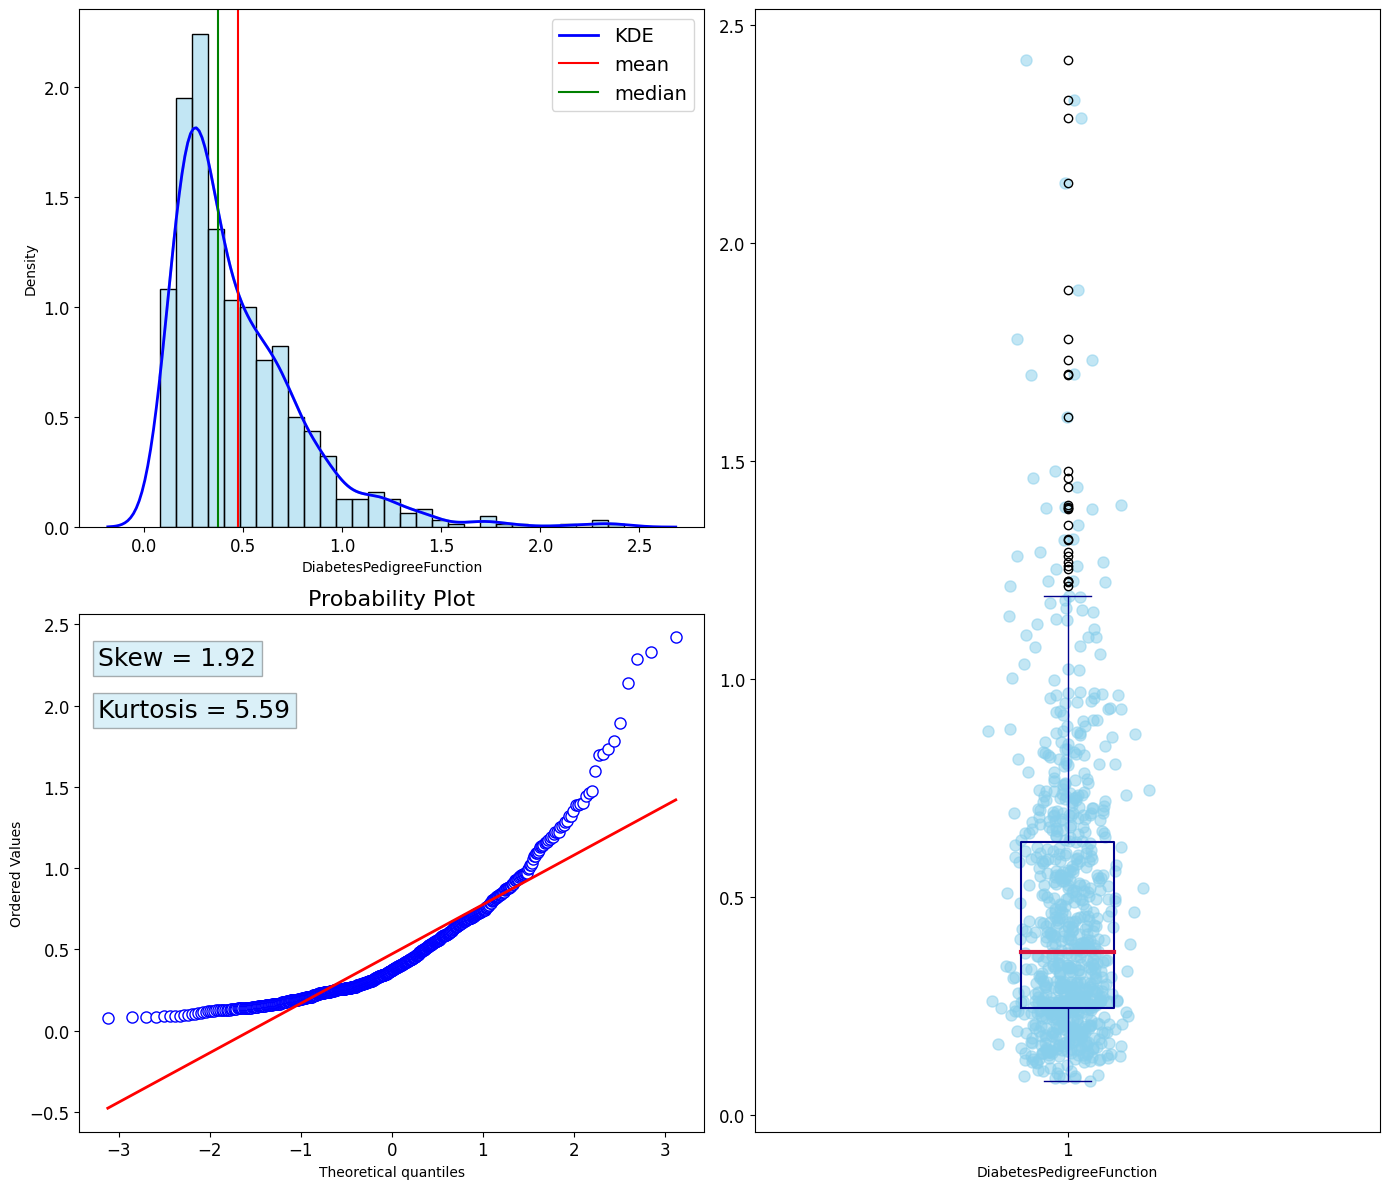

In [72]:
distribution_plot(df['DiabetesPedigreeFunction'])

# 6. Machine Learning Algorythms

## 6.1 Split to Train and Test Data

In [73]:
X = df. drop('Outcome', axis=1)
y = df['Outcome']

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## 6.2 Classification Algorithms

### KNeighborsClassifier

The algorithm classifies a new data point by finding the "k" nearest neighbors to that point from the training dataset, based on a distance metric, such as Euclidean or Manhattan distance. The class of the new data point is then assigned based on the majority class among the k-nearest neighbors.

In [75]:
knn = KNeighborsClassifier()

In [76]:
n_neighbors = list(range(3,15))
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball tree', 'kde_tree', 'brute']
leaf_size = [5,10,20]
p = [1,2]

paramteres = dict(n_neighbors = n_neighbors, weights = weights, algorithm=algorithm, leaf_size=leaf_size, p=p)

In [77]:
cv = KFold(n_splits=10, shuffle=True, random_state=15)

In [78]:
gridsearch = GridSearchCV(knn, param_grid=paramteres, cv=cv, n_jobs=1, scoring='accuracy')

In [79]:
best_model = gridsearch.fit(X_train, y_train)

In [80]:
best_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 5,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'distance'}

In [81]:
knn = KNeighborsClassifier(**best_model.best_params_)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [82]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86        99
           1       0.76      0.75      0.75        55

    accuracy                           0.82       154
   macro avg       0.81      0.81      0.81       154
weighted avg       0.82      0.82      0.82       154



<Axes: >

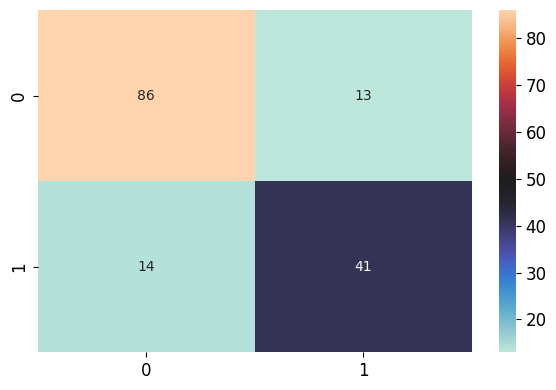

In [83]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), ax=ax, annot=True, cmap='icefire')

### Support Vector Classification

SVC works by finding a hyperplane that maximizes the margin between the different classes in the data. The hyperplane is defined by a set of support vectors, which are data points that lie closest to the hyperplane. The distance between the hyperplane and the support vectors is known as the margin, and the algorithm tries to maximize this distance while still correctly classifying all the training data.

In [84]:
svc = SVC()

In [85]:
kernel = ['poly', 'rbf']
degree = [3,4]
C = [10,12,14]

parameters = dict(kernel=kernel, degree=degree, C=C)

In [86]:
gridsearch = GridSearchCV(estimator=svc, param_grid=parameters, cv=cv, scoring='accuracy')

In [87]:
best_model = gridsearch.fit(X_train, y_train)

In [88]:
best_model.best_params_

{'C': 12, 'degree': 3, 'kernel': 'rbf'}

In [89]:
svc = SVC(**best_model.best_params_)
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.81      0.84      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



<Axes: >

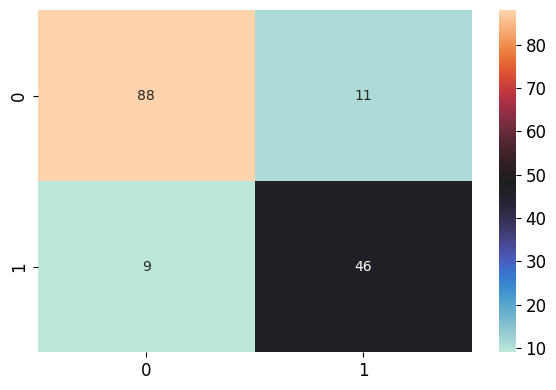

In [91]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax, cmap='icefire')

### Random Forest Classifier

Random Forest Classifier is a popular supervised machine learning algorithm that is used for classification problems. It is an ensemble learning method that operates by creating multiple decision trees during training and combining them to generate a more accurate and robust model.

Each decision tree in the Random Forest is constructed by a random subset of the features and training samples. This is done to prevent overfitting and improve the accuracy of the model. During training, the Random Forest algorithm generates a large number of decision trees, each with different subsets of the training data and features.

In [92]:
rf = RandomForestClassifier()

In [93]:
n_estimators = [300,350]
criterion = ['gini', 'entropy', 'log_loss']
max_depth = [3,4,5]

In [94]:
parameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth)

In [95]:
gridsearch = GridSearchCV(estimator=rf, param_grid=parameters, cv=cv, scoring='f1')

In [96]:
best_model = gridsearch.fit(X_train, y_train)

In [97]:
best_model.best_params_

{'criterion': 'log_loss', 'max_depth': 5, 'n_estimators': 300}

In [98]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        99
           1       0.81      0.84      0.82        55

    accuracy                           0.87       154
   macro avg       0.86      0.86      0.86       154
weighted avg       0.87      0.87      0.87       154



Based on the classification reports, it was decided to use the <b>Random Forest Classifier</b> as the prediction model for the issue of diabetes.

## 6.3 Feature Importances

In [99]:
rf = RandomForestClassifier(n_estimators=350, criterion='entropy', max_depth=5)
rf.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=5, n_estimators=350)

In [100]:
feature_importance = rf.feature_importances_

Text(0.5, 1.0, 'Feature Importance')

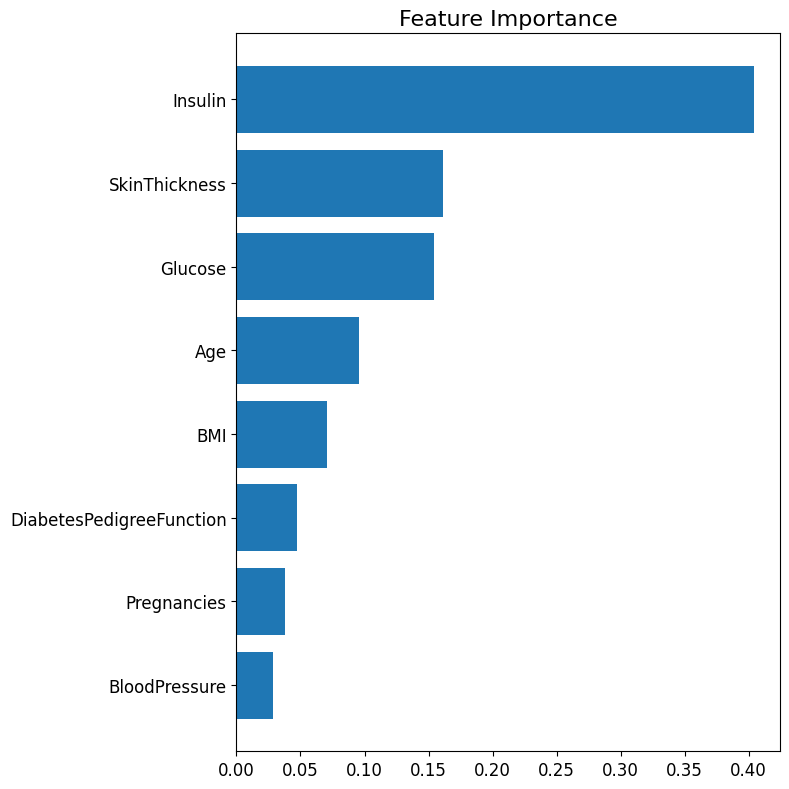

In [101]:
sorted_idx = feature_importance.argsort()
fig = plt.figure(figsize=(8, 8))
plt.barh(X.columns[sorted_idx], feature_importance[sorted_idx])
plt.title('Feature Importance')

Based on the feature importances diagram, the most important features are insulin, glucose, and skin thickness, while the less important features are blood pressure, number of pregnancies, and the diabetes pedigree function.

## 6.4 Building Random Forest Classfier

In [102]:
X = df.drop(['Outcome', 'BloodPressure', 'DiabetesPedigreeFunction'], axis=1)
y = df['Outcome']

In [103]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

Based on the standard deviation threshold, correlation matrix, boxplots, and feature importances for the Random Forest Classifier, it was decided to drop <b>BloodPressure</b> and <b>DiabetesPedigreeFunction</b> from the independent variables.

In [104]:
model = RandomForestClassifier(n_estimators=350, max_depth=5, criterion='entropy')
pt = PowerTransformer()
qt = QuantileTransformer(n_quantiles=1200, output_distribution='normal')
scaler = StandardScaler()

pipe = Pipeline(steps=[('power',pt),('scaler',scaler) , ('model', model)])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)


# 7. Model Validation

## 7.1 ROC Curve

In [105]:
y_score = pipe.predict_proba(X_test)[:,1]
FPR, TPR, trsh = roc_curve(y_test, y_score, pos_label=1)
AUC = np.trapz(TPR, FPR)

Text(0.2, 0.8, 'AUC=0.93')

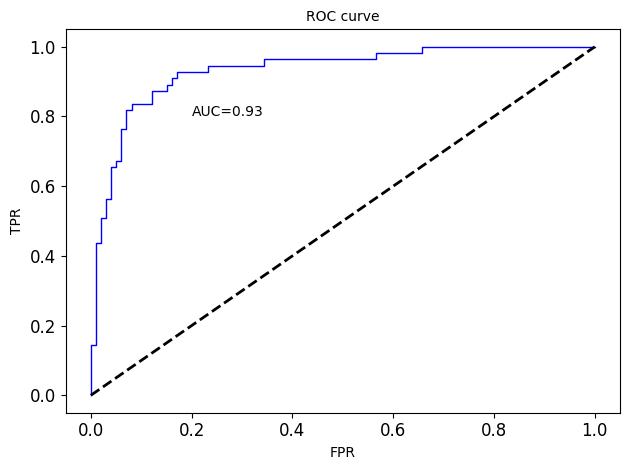

In [106]:
fig, ax = plt.subplots()
ax.plot(FPR, TPR, linewidth=1, c='blue')
ax.plot([0,1], [0,1], '--', c='black')
ax.set_title('ROC curve', fontsize=10)
ax.set_xlabel('FPR')
ax.set_ylabel('TPR')
ax.text(0.2,0.8, 'AUC=%.2f' %AUC)


## 7.2 Classification Report

In [107]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.88      0.90        99
           1       0.80      0.87      0.83        55

    accuracy                           0.88       154
   macro avg       0.86      0.88      0.87       154
weighted avg       0.88      0.88      0.88       154



## 7.3 Confussion Matrix

<Axes: >

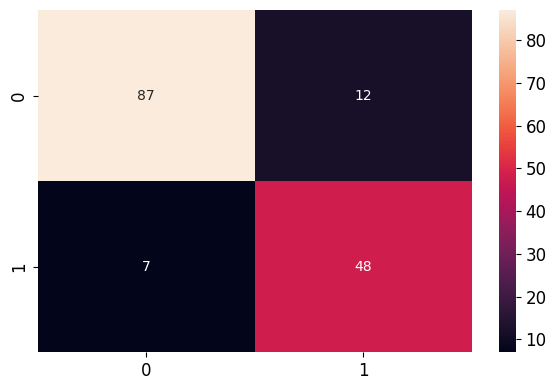

In [108]:
fig, ax = plt.subplots(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)

## 7.4 Save model to Pickle

In [109]:
pickle.dump(pipe, open('model.pkl','wb'))